In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df1 = pd.read_csv("first-step.csv", encoding='ISO-8859-1')
df1.head()

,Make,Model,Year,Km,Transmission,Fuel,Price
0,Chery,Arrizo 5,2020.0,77000.0,automatic,gas,355000.0
1,Hyundai,Accent RB,2017.0,95000.0,automatic,gas,400000.0
2,Kia,Cerato,2016.0,106000.0,automatic,gas,415000.0
3,Chrysler,300,2006.0,155000.0,automatic,gas,650000.0
4,Dodge,Charger,2010.0,80000.0,automatic,gas,800000.0


In [2]:
df = df1.copy()

In [4]:
df.head()

,Make,Model,Year,Km,Transmission,Fuel,Price
0,Chery,Arrizo 5,2020.0,77000.0,automatic,gas,355000.0
1,Hyundai,Accent RB,2017.0,95000.0,automatic,gas,400000.0
2,Kia,Cerato,2016.0,106000.0,automatic,gas,415000.0
3,Chrysler,300,2006.0,155000.0,automatic,gas,650000.0
4,Dodge,Charger,2010.0,80000.0,automatic,gas,800000.0


In [5]:
df.isnull().sum()

Make            0
Model           0
Year            0
Km              0
Transmission    0
Fuel            0
Price           0
dtype: int64

In [6]:
df[df==0].count()

Make            0
Model           0
Year            0
Km              0
Transmission    0
Fuel            0
Price           0
dtype: int64

In [7]:
print(df.dtypes)

Make             object
Model            object
Year            float64
Km              float64
Transmission     object
Fuel             object
Price           float64
dtype: object


In [8]:
df.describe()

,Year,Km,Price
count,20076.000000,2.007600e+04,2.007600e+04
mean,2011.802799,1.244430e+05,4.143214e+05
std,10.256011,1.764577e+05,4.612127e+05
min,1951.000000,1.000000e+00,1.000000e+00
25%,2008.000000,5.600000e+04,1.550000e+05
50%,2015.000000,1.110000e+05,3.200000e+05
75%,2020.000000,1.724041e+05,5.000000e+05
max,2024.000000,1.000000e+07,1.000000e+07


<Axes: xlabel='Km'>

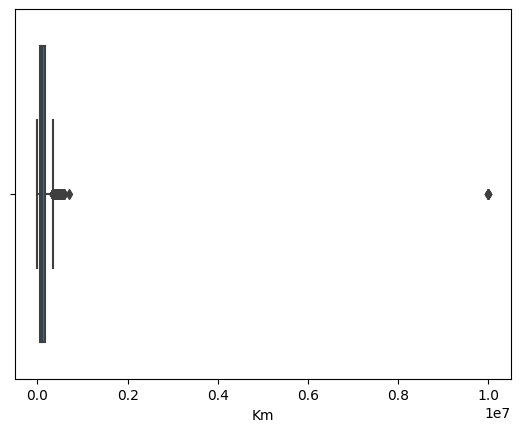

In [3]:
#Exploring KM distribution
sns.boxplot(x=df['Km'])

In [4]:
#Exploring the abnormal KM Values
newdf = df[df['Km']>7.0e+06] 
newdf

,Make,Model,Year,Km,Transmission,Fuel,Price
13,Speranza,A516,2009.0,10000000.0,automatic,gas,107000.0
19929,Speranza,A516,2009.0,10000000.0,automatic,gas,107000.0
19969,Speranza,A516,2009.0,10000000.0,automatic,gas,107000.0
20009,Speranza,A516,2009.0,10000000.0,automatic,gas,107000.0
20049,Speranza,A516,2009.0,10000000.0,automatic,gas,107000.0


In [5]:
#dropping it
df = df[df.Km != 1.0e+07]

<Axes: xlabel='Km'>

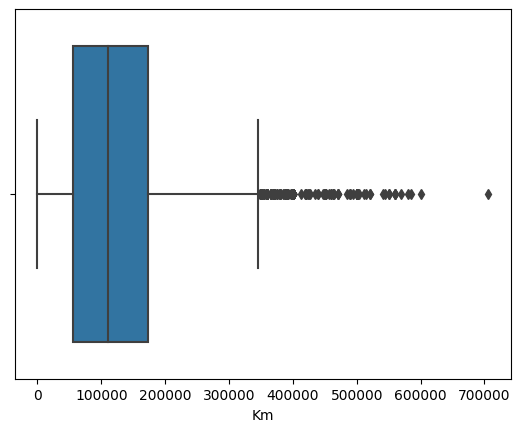

In [6]:
#Exploring KM distribution
sns.boxplot(x=df['Km'])

In [15]:
#Exploring the abnormal KM Values
newdf = df[df['Km']>3.5e+05] 
newdf

,Make,Model,Year,Km,Transmission,Fuel,Price
170,Byd,F3,2014.0,520552.0,manual,natural gas,140000.0
216,Hyundai,Verna,2010.0,500000.0,manual,gas,145000.0
234,Hyundai,Accent,2006.0,370000.0,manual,gas,95000.0
404,BMW,318,2002.0,451463.0,automatic,gas,250000.0
445,Daewoo,Lanos 2,2002.0,400000.0,manual,gas,117000.0
...,...,...,...,...,...,...,...
19685,Mitsubishi,Lancer Crystala,1999.0,400000.0,manual,gas,125000.0
19729,Skoda,Octavia A7,2017.0,800000.0,automatic,gas,650000.0
19734,Mercedes,E 200 AMG,2022.0,500000.0,automatic,gas,2950000.0
19766,Hyundai,Elantra,2010.0,424786.0,manual,gas,245000.0


In [18]:
#Replacing outliers KM entries with the maximum

from random import randint
df1 = df[df['Km']>3.4e+05]
indexes = df1.index.values.tolist()

for i in indexes :
    df.loc[i,['Km']] = [3.4e+05]

<Axes: xlabel='Km'>

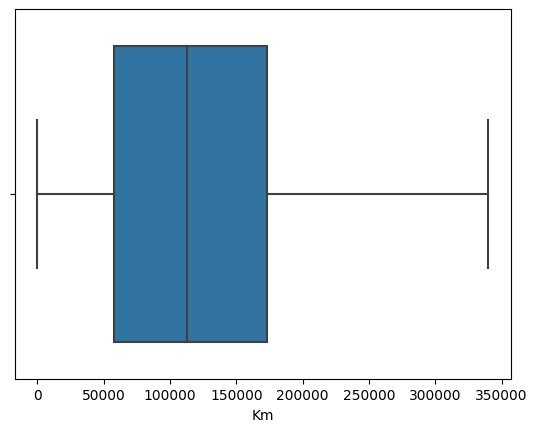

In [19]:
#Exploring KM distribution
sns.boxplot(x=df['Km'])

In [25]:
#Exploring the abnormal KM Values
newdf = df[(df['Km']<1000)&(df['Year']!=2023)] 
newdf

,Make,Model,Year,Km,Transmission,Fuel,Price


In [21]:
#Fixing the entries
df.loc[(df['Km']<1000) & (df['Year']!=2024) & (df['Year']!=2023) , 'Km'] *= 1000

In [22]:
#Checking
newdf = df[(df['Km']<900)&(df['Year']!=2023) & (df['Year']!=2022)] 
newdf

,Make,Model,Year,Km,Transmission,Fuel,Price


<Axes: xlabel='Price'>

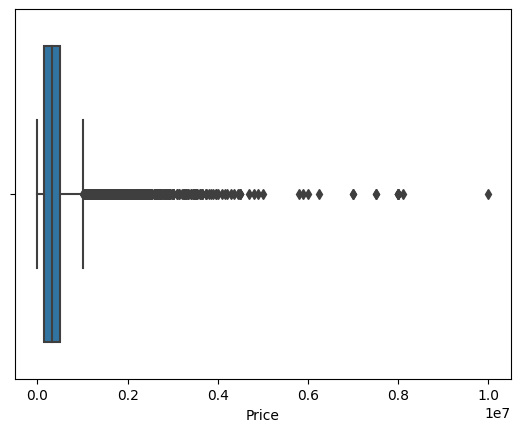

In [26]:
#Exploring Price distribution
sns.boxplot(x=df['Price'])

In [27]:
#Exploring the abnormal Price Values
newdf = df[df['Price']>7.0e+06] 
newdf

,Make,Model,Year,Km,Transmission,Fuel,Price
35,Kia,Sportage,2019.0,105000.000000,automatic,gas,8000050.0
1160,Mercedes,S 500,2022.0,24225.710052,automatic,gas,8100000.0
14207,Mercedes,G Class,2022.0,1700.000000,automatic,gas,10000000.0
14840,Land Rover,Range Rover Sport || Sport,2022.0,10000.000000,automatic,gas,7500000.0
15369,Maserati,Levante,2022.0,10000.000000,automatic,gas,7500000.0
19951,Kia,Sportage,2019.0,105000.000000,automatic,gas,8000050.0
19991,Kia,Sportage,2019.0,105000.000000,automatic,gas,8000050.0
20031,Kia,Sportage,2019.0,105000.000000,automatic,gas,8000050.0
20071,Kia,Sportage,2019.0,105000.000000,automatic,gas,8000050.0


In [28]:
#Fixing the entry and drooping its duplicates
df.loc[35,['Price']] = [800050]
df = df[df.Price != 8000050.0]

In [32]:
#Exploring the abnormal Price Values
newdf = df[df['Price']>5.0e+06] 
newdf

,Make,Model,Year,Km,Transmission,Fuel,Price
879,Bentley,Flying Spur,2015.0,30000.000000,automatic,gas,6000000.0
1160,Mercedes,S 500,2022.0,24225.710052,automatic,gas,8100000.0
5497,Mercedes,S 450,2022.0,24225.710052,automatic,gas,7000000.0
11661,Lexus,LX 570,2018.0,41000.000000,automatic,gas,6250000.0
14207,Mercedes,G Class,2022.0,1700.000000,automatic,gas,10000000.0
14332,Mercedes,S 500,2021.0,340000.000000,automatic,gas,7000000.0
14840,Land Rover,Range Rover Sport || Sport,2022.0,10000.000000,automatic,gas,7500000.0
15369,Maserati,Levante,2022.0,10000.000000,automatic,gas,7500000.0
17954,Toyota,Land Cruiser,2022.0,24225.710052,automatic,gas,5800000.0
17955,Land Rover,Range Rover Sport || Sport,2021.0,8000.000000,automatic,gas,5900000.0


In [33]:
#Dropping them
df = df[df['Price'] < 5.0e+06]

<Axes: xlabel='Price'>

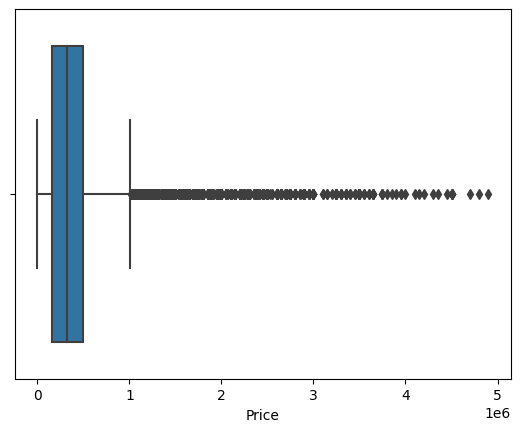

In [34]:
#Exploring Price distribution
sns.boxplot(x=df['Price'])

In [35]:
#Exploring the abnormal Price Values
newdf = df[df['Price']<10000] 
newdf

,Make,Model,Year,Km,Transmission,Fuel,Price
15,Nissan,Sentra,2018.0,45000.0,automatic,gas,450.0
23,Opel,Crossland,2021.0,52000.0,automatic,gas,1000.0
39,Renault,Logan,2011.0,240000.0,manual,gas,160.0
386,Chevrolet,Aveo,2012.0,210000.0,manual,gas,9999.0
431,Hyundai,Elantra HD,2021.0,40000.0,automatic,gas,1.0
2030,Chevrolet,Pickup,2019.0,61000.0,manual,diesel,420.0
3327,Toyota,Corolla,2016.0,130000.0,manual,gas,1.0
4681,Speranza,A11,2023.0,50000.0,automatic,gas,1.0
4706,Nissan,Sentra,2018.0,115500.0,automatic,gas,1.0
6180,Hyundai,Elantra HD,2017.0,180000.0,automatic,gas,350.0


In [38]:
#drop price 1 and 2
df = df[(df.Price != 1.0)]
df = df[(df.Price != 2.0)]

#dropping a duplicate wrong data
df = df.drop(20059)
df = df.drop(20019)
df = df.drop(19979)
df = df.drop(19939)
df = df.drop(23)

In [39]:
#Exploring the abnormal Price Values
newdf = df[df['Price']<10000] 
newdf

,Make,Model,Year,Km,Transmission,Fuel,Price
15,Nissan,Sentra,2018.0,45000.0,automatic,gas,450.0
39,Renault,Logan,2011.0,240000.0,manual,gas,160.0
386,Chevrolet,Aveo,2012.0,210000.0,manual,gas,9999.0
2030,Chevrolet,Pickup,2019.0,61000.0,manual,diesel,420.0
6180,Hyundai,Elantra HD,2017.0,180000.0,automatic,gas,350.0
7747,Nissan,Sunny,2020.0,177000.0,automatic,gas,315.0
14486,Mercedes,280,2005.0,170000.0,automatic,gas,1000.0
16390,Hyundai,Elantra AD,2017.0,123000.0,automatic,gas,435.0
19931,Nissan,Sentra,2018.0,45000.0,automatic,gas,450.0
19955,Renault,Logan,2011.0,240000.0,manual,gas,160.0


In [40]:
#Fixing entries
df.loc[386,'Price'] *= 10
df = df.drop(14486)

#Fixing a duplicate and dropping the rest
df.loc[15,'Price'] *= 1000
df = df.drop(19931)
df = df.drop(20011)
df = df.drop(20051)

In [41]:
#Fixing the rest
df.loc[df['Price']<1000 , 'Price'] *= 1000


#Exploring the abnormal Price Values
newdf = df[df['Price']<10000] 
newdf

,Make,Model,Year,Km,Transmission,Fuel,Price


In [42]:
df.describe()

,Year,Km,Price
count,20037.000000,20037.000000,2.003700e+04
mean,2011.792184,122377.412827,4.095089e+05
std,10.260051,79518.387404,4.175662e+05
min,1951.000000,1.000000,1.000000e+04
25%,2008.000000,58000.000000,1.550000e+05
50%,2015.000000,113000.000000,3.200000e+05
75%,2020.000000,173000.000000,5.000000e+05
max,2024.000000,340000.000000,4.900000e+06


<Axes: xlabel='Year'>

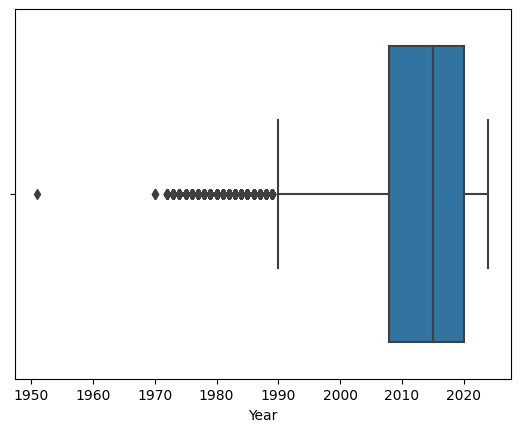

In [43]:
#Exploring Year distribution
sns.boxplot(x=df['Year'])

In [44]:
#Exploring the abnormal Year Values
newdf = df[df['Year']<1970] 
newdf

,Make,Model,Year,Km,Transmission,Fuel,Price
12805,Opel,Astra,1951.0,100000.0,automatic,gas,500000.0


In [45]:
#dropping it
df = df.drop(12805)

<Axes: xlabel='Year'>

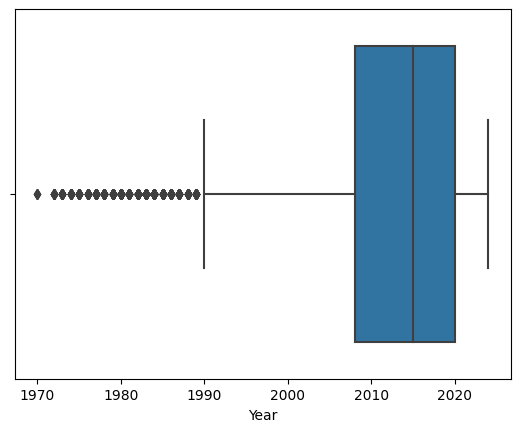

In [46]:
#Exploring Year distribution
sns.boxplot(x=df['Year'])

In [47]:
# Number of uniques values in Data
pd.DataFrame({'': df.columns , 'Number of unique values':  df.nunique().values})

,,Number of unique values
0,Make,94
1,Model,836
2,Year,54
3,Km,998
4,Transmission,4
5,Fuel,5
6,Price,734


In [48]:
df.Make.value_counts(ascending=True)

Lexus           1
Emgrand         1
JMC             1
Kaiyi           1
Bentley         1
             ... 
Fiat         1246
Nissan       1378
Chevrolet    1389
Kia          1399
Hyundai      2139
Name: Make, Length: 94, dtype: int64

In [50]:
#selecting the makes with low number of data
a = list(map(list, df["Make"].value_counts().items()))
d = [a[m][0] for m in range(len(a)) if a[m][1] < 10 ]
d

['Porsche',
 'Haima',
 'Mahindra',
 'Dongfeng',
 'Gmc',
 'Soueast',
 'Datsun',
 'Buick',
 'Lancia',
 'Foton',
 'Infiniti',
 'Cadillac',
 'Sokon',
 'Victory',
 'Perodua',
 'Cupra',
 'Hummer',
 'Hawtai',
 'Hafei',
 'Landwind',
 'Keyton',
 'Lincoln',
 'Pontiac',
 'Exeed',
 'Forthing',
 'Bentley',
 'Emgrand',
 'Kaiyi',
 'JMC',
 'Maserati',
 'Smart',
 'Aston Martin',
 'Lexus']

In [51]:
#Dropping them
df = df[~df['Make'].isin(d)]

In [53]:
df.Make.value_counts(ascending=True)

Bestune        10
Karry          11
Saipa          11
Tesla          11
Faw            12
             ... 
Fiat         1246
Nissan       1378
Chevrolet    1389
Kia          1399
Hyundai      2139
Name: Make, Length: 61, dtype: int64

In [54]:
# Number of uniques values in Data
pd.DataFrame({'': df.columns , 'Number of unique values':  df.nunique().values})

,,Number of unique values
0,Make,61
1,Model,784
2,Year,54
3,Km,995
4,Transmission,4
5,Fuel,5
6,Price,728


In [55]:
#extracting all models to a list
b = list(map(list, df["Model"].value_counts().items()))
b

[['Sunny', 952],
 ['Corolla', 641],
 ['Optra', 479],
 ['Cerato', 388],
 ['F3', 362],
 ['Logan', 353],
 ['Lancer EX Shark', 343],
 ['Tipo', 337],
 ['Lanos', 337],
 ['Sportage', 320],
 ['Verna', 258],
 ['5', 256],
 ['Astra', 246],
 ['128', 240],
 ['Elantra HD', 233],
 ['Arrizo 5', 212],
 ['Aveo', 206],
 ['Nubira 2', 202],
 ['Emgrand 7', 201],
 ['Lancer Puma', 189],
 ['C 180', 181],
 ['Elantra MD', 170],
 ['Qashqai', 163],
 ['Tucson', 155],
 ['Megane', 149],
 ['Passat', 140],
 ['Accent RB', 139],
 ['Tiggo 3', 138],
 ['A516', 138],
 ['Sentra', 137],
 ['Accent', 133],
 ['Van', 127],
 ['Cruze', 126],
 ['Vectra', 126],
 ['Elantra', 121],
 ['Shahin', 119],
 ['Excel', 119],
 ['Carens', 117],
 ['Octavia A4', 116],
 ['Granta', 116],
 ['Elantra AD', 115],
 ['ZS', 105],
 ['Insignia', 104],
 ['Duster', 101],
 ['Tiggo', 101],
 ['2107', 101],
 ['Rio', 99],
 ['Elantra CN7', 99],
 ['6', 97],
 ['3008', 96],
 ['127', 94],
 ['Focus', 92],
 ['320', 91],
 ['508', 89],
 ['T-Series', 89],
 ['Sandero Step Way',

In [56]:
#selecting the models with low number of data
b = list(map(list, df["Model"].value_counts().items()))
f = [b[m][0] for m in range(len(b)) if b[m][1] < 10 ]
f

['Carnival',
 'S4',
 'Attrage',
 '1500',
 'Arona',
 '740',
 '240',
 'Xpander',
 'Imperial',
 'Dart',
 'JS3',
 'CS 15',
 'C 300',
 'Range Rover Sport || Sport',
 'Grand i10',
 '929',
 'Xplosion',
 'Okavango',
 'Lancer',
 'Suran',
 'A213',
 'Parati',
 'Punto evo',
 'Persona',
 'Golf 6',
 'Symbol',
 'EcoSport',
 '528',
 'Petra',
 'C 250',
 'Minivan',
 'Q5',
 '2017',
 'C31',
 '750',
 'Malibu',
 'X4',
 'Espero',
 'XD',
 'DS5',
 'Eado',
 '3',
 'XC60',
 'Tercel',
 'Familia',
 'Tiba',
 'C3 Aircross',
 'Kamiq',
 'Accord',
 'XTrail',
 'E 280',
 '206',
 'Golf 5',
 'FRV Cross',
 'V3',
 'ID 4',
 '146',
 '305',
 'Range Rover Evoque || Evoque',
 'Musso',
 'XC 40',
 '308 sw',
 'Mk',
 'Palio',
 'Xsara',
 'Cool Ray',
 'Veloster',
 'Charger',
 'Saipa',
 'C4 Picasso',
 'Starlet',
 'Ck2',
 'Trax',
 '1300',
 'Model Y',
 'S 500',
 'Peri',
 '118',
 'Galant',
 'Mini Cooper S',
 'Chery QQ || Chery qq',
 'Doblo',
 '280',
 'Elantra Coupe',
 'Durango',
 'Ram',
 'X95',
 '330',
 'Preve',
 'Model 3',
 '205',
 'Q35',


In [57]:
#Dropping them
df = df[~df['Model'].isin(f)]

In [58]:
# Number of uniques values in Data
pd.DataFrame({'': df.columns , 'Number of unique values':  df.nunique().values})

,,Number of unique values
0,Make,54
1,Model,303
2,Year,54
3,Km,959
4,Transmission,4
5,Fuel,5
6,Price,699


In [59]:
df.Transmission.value_counts()

automatic    12578
manual        5835
CVT              7
DSG              2
Name: Transmission, dtype: int64

In [60]:
#Dropping Transmssion types with low number of data
df = df[(df['Transmission'] != 'CVT') & (df['Transmission'] != 'DSG')]

In [61]:
df.Fuel.value_counts()

gas            17847
natural gas      285
diesel           252
Hybrid            27
Electric           2
Name: Fuel, dtype: int64

In [62]:
#Dropping Fuel types with low number of data
df = df[(df['Fuel'] != 'Hybrid') & (df['Fuel']!='Electric')]

In [63]:
# Number of uniques values in Data
pd.DataFrame({'': df.columns , 'Number of unique values':  df.nunique().values})

,,Number of unique values
0,Make,54
1,Model,303
2,Year,54
3,Km,957
4,Transmission,2
5,Fuel,3
6,Price,698


In [64]:
#selecting the years with low number of data
p = list(map(list, df["Year"].value_counts().items()))
g = [p[m][0] for m in range(len(p)) if p[m][1] < 5 ]
g

[1970.0, 2024.0]

In [65]:
#Dropping them
df = df[~df['Year'].isin(g)]

In [66]:
# Number of uniques values in Data
pd.DataFrame({'': df.columns , 'Number of unique values':  df.nunique().values})

,,Number of unique values
0,Make,54
1,Model,303
2,Year,52
3,Km,956
4,Transmission,2
5,Fuel,3
6,Price,698


In [67]:
df.shape

(18381, 7)

In [68]:
df.to_csv("2nd-step.csv",index=False)